In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
df = pd.read_csv("wbd data.csv")

In [3]:
df.head()

,Series Name,GDP growth (annual %),Net official development assistance received (current US$),Gross capital formation (% of GDP),General government final consumption expenditure (% of GDP),Trade (% of GDP),"Inflation, consumer prices (annual %)"
0,1963 [YR1963],8.778340,55590000.15,..,11.470881,60.995712,0.697674
1,1964 [YR1964],4.964467,56709999.08,13.06420449,13.849177,62.601644,-0.099305
2,1965 [YR1965],2.009094,72129997.25,14.39394484,14.842877,62.093171,3.578529
3,1966 [YR1966],14.728566,55409999.85,18.61024061,13.729260,63.284436,5.014395
4,1967 [YR1967],3.361232,36709999.08,20.1726488,14.129941,57.837347,1.759196


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Series Name                                                  61 non-null     object 
 1   GDP growth (annual %)                                        61 non-null     float64
 2   Net official development assistance received (current US$)   61 non-null     object 
 3   Gross capital formation (% of GDP)                           61 non-null     object 
 4   General government final consumption expenditure (% of GDP)  61 non-null     float64
 5   Trade (% of GDP)                                             61 non-null     float64
 6   Inflation, consumer prices (annual %)                        61 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.5+ KB


In [5]:
#Extract Years from "Series Name" to delete the years in brackets and remain with the years outside the bracket
df["Series Name"] = df["Series Name"].str.extract(r"(\d{4})")
df.head()

,Series Name,GDP growth (annual %),Net official development assistance received (current US$),Gross capital formation (% of GDP),General government final consumption expenditure (% of GDP),Trade (% of GDP),"Inflation, consumer prices (annual %)"
0,1963,8.778340,55590000.15,..,11.470881,60.995712,0.697674
1,1964,4.964467,56709999.08,13.06420449,13.849177,62.601644,-0.099305
2,1965,2.009094,72129997.25,14.39394484,14.842877,62.093171,3.578529
3,1966,14.728566,55409999.85,18.61024061,13.729260,63.284436,5.014395
4,1967,3.361232,36709999.08,20.1726488,14.129941,57.837347,1.759196


In [7]:
#Renaming columns
df.rename(columns={
    "Series Name": "Year",
    "GDP growth (annual %)": "GDP Growth Rate",
    "Net official development assistance received (current US$)": "Foreign Aid",
    "Gross capital formation (% of GDP)": "Investment",
    "General government final consumption expenditure (% of GDP)": "Govt Expenditure",
    "Trade (% of GDP)": "Trade Openness",
    "Inflation, consumer prices (annual %)": "Inflation"
}, inplace=True)
df.head()



,Year,GDP Growth Rate,Foreign Aid,Investment,Govt Expenditure,Trade Openness,Inflation
0,1963,8.778340,55590000.15,..,11.470881,60.995712,0.697674
1,1964,4.964467,56709999.08,13.06420449,13.849177,62.601644,-0.099305
2,1965,2.009094,72129997.25,14.39394484,14.842877,62.093171,3.578529
3,1966,14.728566,55409999.85,18.61024061,13.729260,63.284436,5.014395
4,1967,3.361232,36709999.08,20.1726488,14.129941,57.837347,1.759196


In [8]:
#Set "Year" as Index
df.set_index("Year", inplace=True)
df.head()

,GDP Growth Rate,Foreign Aid,Investment,Govt Expenditure,Trade Openness,Inflation
Year,,,,,,
1963,8.778340,55590000.15,..,11.470881,60.995712,0.697674
1964,4.964467,56709999.08,13.06420449,13.849177,62.601644,-0.099305
1965,2.009094,72129997.25,14.39394484,14.842877,62.093171,3.578529
1966,14.728566,55409999.85,18.61024061,13.729260,63.284436,5.014395
1967,3.361232,36709999.08,20.1726488,14.129941,57.837347,1.759196


In [9]:
#Converting the foreign aid and Investment columns to a float
df["Foreign Aid"] = (df["Foreign Aid"].replace("..", np.nan).astype(float))
df['Investment'] = pd.to_numeric(df['Investment'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1963 to 2023
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GDP Growth Rate   61 non-null     float64
 1   Foreign Aid       60 non-null     float64
 2   Investment        60 non-null     float64
 3   Govt Expenditure  61 non-null     float64
 4   Trade Openness    61 non-null     float64
 5   Inflation         61 non-null     float64
dtypes: float64(6)
memory usage: 3.3+ KB


In [14]:
#Filling the null value in foreign aid and Investment with the mean
df["Foreign Aid"] = df["Foreign Aid"].fillna(df["Foreign Aid"].mean())
df["Investment"] = df["Investment"].fillna(df["Investment"].mean())

df.head()


,GDP Growth Rate,Foreign Aid,Investment,Govt Expenditure,Trade Openness,Inflation
Year,,,,,,
1963,8.778340,55590000.15,20.364695,11.470881,60.995712,0.697674
1964,4.964467,56709999.08,13.064204,13.849177,62.601644,-0.099305
1965,2.009094,72129997.25,14.393945,14.842877,62.093171,3.578529
1966,14.728566,55409999.85,18.610241,13.729260,63.284436,5.014395
1967,3.361232,36709999.08,20.172649,14.129941,57.837347,1.759196


The model has shocks as a binary variable  
We therefore create a dummy variable for shocks, where;  
1 - shocks occurred  
0 - No shocks   

In [15]:
#converting my index column(Year) to integer.
df.index = pd.to_numeric(df.index, errors='coerce', downcast='integer')
#defining my shock years
shock_years = [1966,1975,1982,1992,1993,1997,2007,2008,2011,2020]
#Creating a new column for Shocks
df["Shocks"] = df.index.isin(shock_years).astype(int)
df.head(10)   



,GDP Growth Rate,Foreign Aid,Investment,Govt Expenditure,Trade Openness,Inflation,Shocks
Year,,,,,,,
1963,8.778340,55590000.15,20.364695,11.470881,60.995712,0.697674,0
1964,4.964467,56709999.08,13.064204,13.849177,62.601644,-0.099305,0
1965,2.009094,72129997.25,14.393945,14.842877,62.093171,3.578529,0
1966,14.728566,55409999.85,18.610241,13.729260,63.284436,5.014395,1
1967,3.361232,36709999.08,20.172649,14.129941,57.837347,1.759196,0
1968,7.982690,60709999.08,20.048829,15.207316,58.698171,0.366712,0
1969,7.959224,55810001.37,19.372180,16.434674,57.617356,-0.171501,0
1970,-4.655447,57349998.47,24.396675,16.257465,60.489645,2.188527,0
1971,22.173892,66849998.47,23.915987,17.980288,63.828463,3.780206,0


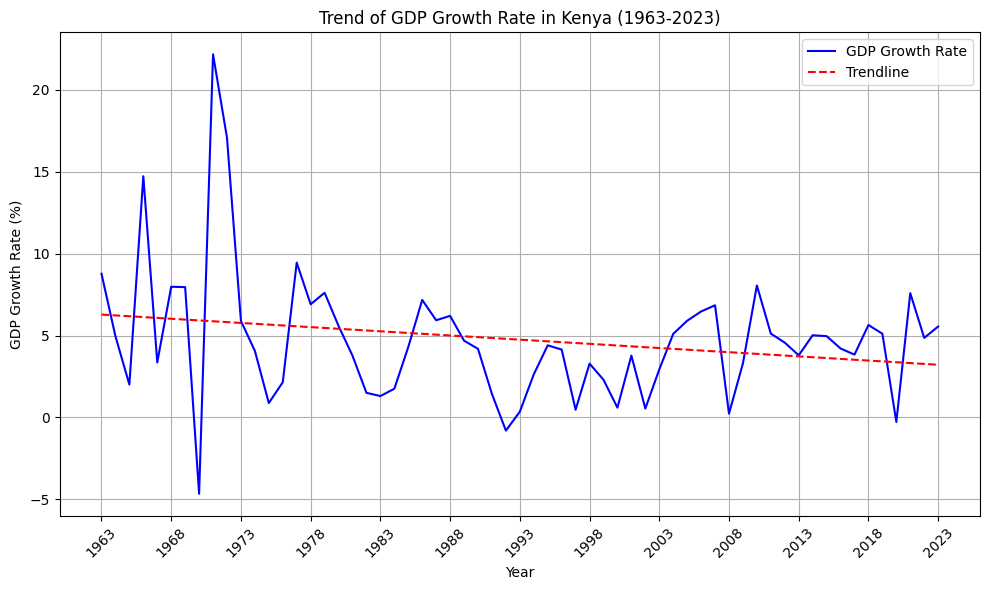

In [16]:


plt.figure(figsize=(10, 6))

# Plotting the GDP growth rate line plot
plt.plot(df.index, df['GDP Growth Rate'], label='GDP Growth Rate', color='blue')

# Fitting a trendline (using numpy's polyfit to fit a linear trendline)
z = np.polyfit(df.index, df['GDP Growth Rate'], 1)
p = np.poly1d(z)

# Plotting the trendline on the same graph
plt.plot(df.index, p(df.index), label='Trendline', color='red', linestyle='--')

# Set title and labels
plt.title('Trend of GDP Growth Rate in Kenya (1963-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')

# Customizing the x-axis to display every 5 years
plt.xticks(np.arange(df.index.min(), df.index.max()+1, 5), rotation=45)

# Adding a legend
plt.legend()

# Display grid and layout adjustments
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
#Saving my cleaned data
df.to_csv('cleaned_data.csv', index=True)